In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prediction-of-sepsis/SHA256SUMS.txt
/kaggle/input/prediction-of-sepsis/utility_sepsis_diagram.svg
/kaggle/input/prediction-of-sepsis/physionet_challenge_2019_ccm_manuscript.pdf
/kaggle/input/prediction-of-sepsis/utility_nonsepsis_diagram.svg
/kaggle/input/prediction-of-sepsis/LICENSE.txt
/kaggle/input/prediction-of-sepsis/Dataset.csv
/kaggle/input/prediction-of-sepsis/training_setA/training/p017072.psv
/kaggle/input/prediction-of-sepsis/training_setA/training/p016153.psv
/kaggle/input/prediction-of-sepsis/training_setA/training/p000465.psv
/kaggle/input/prediction-of-sepsis/training_setA/training/p009891.psv
/kaggle/input/prediction-of-sepsis/training_setA/training/p008065.psv
/kaggle/input/prediction-of-sepsis/training_setA/training/p003516.psv
/kaggle/input/prediction-of-sepsis/training_setA/training/p003052.psv
/kaggle/input/prediction-of-sepsis/training_setA/training/p011093.psv
/kaggle/input/prediction-of-sepsis/training_setA/training/p005419.psv
/kaggle/input/predic

In [5]:
import pandas as pd

# Load CSV
df = pd.read_csv("/kaggle/input/prediction-of-sepsis/Dataset.csv")

# Show first few rows
print(df.shape)
df.head()


(1552210, 44)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [6]:
# List all column names
print(df.columns)

# Check target variable (usually Sepsis or SepsisLabel)
print(df['SepsisLabel'].value_counts())


Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')
SepsisLabel
0    1524294
1      27916
Name: count, dtype: int64


In [1]:
# ==========================
# STEP 1: Import libraries
# ==========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# ==========================
# STEP 2: Load dataset
# ==========================
df = pd.read_csv("/kaggle/input/prediction-of-sepsis/Dataset.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

# ==========================
# STEP 3: Drop unused columns & clean missing values
# ==========================
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Identify feature columns
feature_cols = [col for col in df.columns if col not in ["SepsisLabel", "Patient_ID"]]

# Forward-fill within each patient, then replace remaining NaN with 0
df = (
    df.sort_values(["Patient_ID", "Hour"])
      .groupby("Patient_ID", group_keys=False)[feature_cols]
      .ffill()
      .fillna(0)
)

# Add back patient_id + label
df["Patient_ID"] = pd.read_csv("/kaggle/input/prediction-of-sepsis/Dataset.csv")["Patient_ID"]
df["SepsisLabel"] = pd.read_csv("/kaggle/input/prediction-of-sepsis/Dataset.csv")["SepsisLabel"]

# ==========================
# STEP 4: Normalize features
# ==========================
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# ==========================
# STEP 5: Create sequences per patient
# ==========================
def create_sequences(patient_df, seq_len=12):
    sequences, labels = [], []
    features = patient_df[feature_cols].values
    targets = patient_df["SepsisLabel"].values
    
    for i in range(len(features) - seq_len):
        sequences.append(features[i:i+seq_len])
        labels.append(targets[i+seq_len])
    return np.array(sequences), np.array(labels)

X_seq, y_seq = [], []
for pid, group in df.groupby("Patient_ID"):
    seqs, lbls = create_sequences(group, seq_len=12)  # 12-hour window
    if len(seqs) > 0:
        X_seq.append(seqs)
        y_seq.append(lbls)

X_seq = np.vstack(X_seq)
y_seq = np.hstack(y_seq)

print("Final X shape:", X_seq.shape)  # (samples, timesteps, features)
print("Final y shape:", y_seq.shape)  # (samples,)

# ==========================
# STEP 6: Train/Test Split
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq
)

# ==========================
# STEP 7: Build GRU Model
# ==========================
model = Sequential([
    GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    GRU(32),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC()])
model.summary()

# ==========================
# STEP 8: Train Model
# ==========================
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)

# ==========================
# STEP 9: Evaluate
# ==========================
loss, acc, auc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}, AUC: {auc:.4f}")


2025-09-10 11:30:13.688237: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757503814.018374      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757503814.098329      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Shape: (1552210, 44)
Columns: ['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID']
Final X shape: (1070874, 12, 41)
Final y shape: (1070874,)


2025-09-10 11:32:02.276772: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 12, 64)         │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,985 (117.13 KB)

 Trainable params: 29,985 (117.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
10709/10709 ━━━━━━━━━━━━━━━━━━━━ 216s 20ms/step - accuracy: 0.9768 - auc: 0.7692 - loss: 0.0935 - val_accuracy: 0.9807 - val_auc: 0.8360 - val_loss: 0.0781
Epoch 2/10
10709/10709 ━━━━━━━━━━━━━━━━━━━━ 209s 19ms/step - accuracy: 0.9808 - auc: 0.8428 - loss: 0.0762 - val_accuracy: 0.9810 - val_auc: 0.8741 - val_loss: 0.0708
Epoch 3/10
10709/10709 ━━━━━━━━━━━━━━━━━━━━ 206s 19ms/step - accuracy: 0.9813 - auc: 0.8849 - loss: 0.0681 - val_accuracy: 0.9816 - val_auc: 0.8932 - val_loss: 0.0649
Epoch 4/10
10709/10709 ━━━━━━━━━━━━━━━━━━━━ 207s 19ms/step - accuracy: 0.9821 - auc: 0.9100 - loss: 0.0611 - val_accuracy: 0.9823 - val_auc: 0.9056 - val_loss: 0.0606
Epoch 5/10
10709/10709 ━━━━━━━━━━━━━━━━━━━━ 217s 20ms/step - accuracy: 0.9837 - auc: 0.9257 - loss: 0.0543 - val_accuracy: 0.9832 - val_auc: 0.9201 - val_loss: 0.0554
Epoch 6/10
10709/10709 ━━━━━━━━━━━━━━━━━━━━ 208s 19ms/step - accuracy: 0.9846 - auc: 0.9388 - loss: 0.0495 - val_accuracy: 0.9839 - val_auc: 0.9274 - val_loss: 0.051

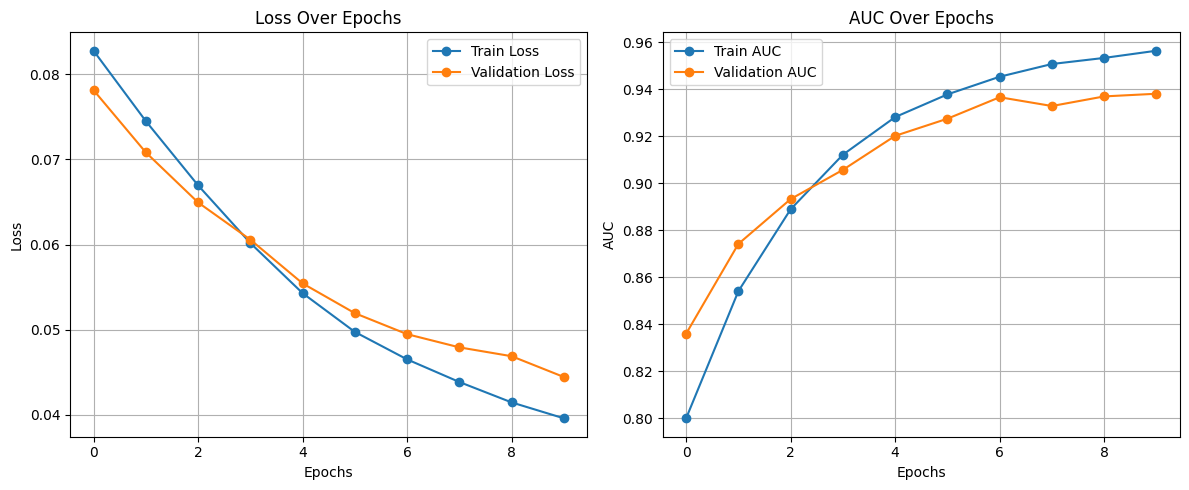

In [2]:
import matplotlib.pyplot as plt

# Suppose 'history' is the object returned by model.fit()
# history = model.fit(...)

# Plot training & validation loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot training & validation AUC
plt.subplot(1,2,2)
plt.plot(history.history['auc'], label='Train AUC', marker='o')
plt.plot(history.history['val_auc'], label='Validation AUC', marker='o')
plt.title('AUC Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [3]:
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]
train_auc = history.history['auc'][-1]
val_auc = history.history['val_auc'][-1]

print(f"Final Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
print(f"Final Training AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}")


Final Training Loss: 0.0396, Validation Loss: 0.0445
Final Training AUC: 0.9563, Validation AUC: 0.9380


In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# y_test = true labels, y_pred = model predictions (threshold 0.5 for binary)
y_pred = (model.predict(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Detailed report
print(classification_report(y_test, y_pred))


6693/6693 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step
Confusion Matrix:
 [[209350    698]
 [  2237   1890]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    210048
           1       0.73      0.46      0.56      4127

    accuracy                           0.99    214175
   macro avg       0.86      0.73      0.78    214175
weighted avg       0.98      0.99      0.98    214175



In [ ]:
from sklearn.metrics import roc_curve, auc

y_score = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

# Suppose X_train, y_train are your current training data
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train_final)}, Validation samples: {len(X_val)}")


Training samples: 685359, Validation samples: 171340


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

# Features = all columns except target + patient id
X = df.drop(columns=['SepsisLabel', 'Patient_ID']).values
y = df['SepsisLabel'].values

print("X shape:", X.shape)
print("y shape:", y.shape)

# Now split into train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)



X shape: (1552210, 41)
y shape: (1552210,)
Train: (1241768, 41) (1241768,)
Validation: (310442, 41) (310442,)


In [8]:
import numpy as np

# Parameters
timesteps = 12   # sequence length
features = 41

# Convert flat data into sequences
X_seq = []
y_seq = []

for pid, group in df.groupby("Patient_ID"):
    values = group.drop(columns=['SepsisLabel', 'Patient_ID']).values
    labels = group['SepsisLabel'].values
    
    for i in range(len(values) - timesteps + 1):
        X_seq.append(values[i:i+timesteps])
        y_seq.append(labels[i+timesteps-1])  # label = last timestep

X = np.array(X_seq)
y = np.array(y_seq)

print("Final X shape:", X.shape)  # (samples, timesteps, features)
print("Final y shape:", y.shape)


Final X shape: (1110191, 12, 41)
Final y shape: (1110191,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)


Train: (888152, 12, 41) (888152,)
Validation: (222039, 12, 41) (222039,)


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',   # or 'val_auc' if you want
    patience=3,           # stop if no improvement for 3 epochs
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,            # large max
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
6939/6939 ━━━━━━━━━━━━━━━━━━━━ 192s 28ms/step - accuracy: 0.9876 - auc: 0.9515 - loss: 0.0396 - val_accuracy: 0.9890 - val_auc: 0.9597 - val_loss: 0.0350
Epoch 2/100
6939/6939 ━━━━━━━━━━━━━━━━━━━━ 197s 28ms/step - accuracy: 0.9887 - auc: 0.9568 - loss: 0.0361 - val_accuracy: 0.9885 - val_auc: 0.9605 - val_loss: 0.0347
Epoch 3/100
6939/6939 ━━━━━━━━━━━━━━━━━━━━ 199s 29ms/step - accuracy: 0.9892 - auc: 0.9602 - loss: 0.0344 - val_accuracy: 0.9893 - val_auc: 0.9587 - val_loss: 0.0338
Epoch 4/100
6939/6939 ━━━━━━━━━━━━━━━━━━━━ 200s 29ms/step - accuracy: 0.9894 - auc: 0.9614 - loss: 0.0337 - val_accuracy: 0.9889 - val_auc: 0.9616 - val_loss: 0.0332
Epoch 5/100
6939/6939 ━━━━━━━━━━━━━━━━━━━━ 197s 28ms/step - accuracy: 0.9899 - auc: 0.9650 - loss: 0.0319 - val_accuracy: 0.9898 - val_auc: 0.9587 - val_loss: 0.0326
Epoch 6/100
6939/6939 ━━━━━━━━━━━━━━━━━━━━ 205s 30ms/step - accuracy: 0.9901 - auc: 0.9637 - loss: 0.0319 - val_accuracy: 0.9901 - val_auc: 0.9588 - val_loss: 0.0315
Epoc

In [11]:
model.save("gru_sepsis_best.h5")


In [12]:
val_loss, val_acc, val_auc = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}, AUC: {val_auc:.4f}")


6939/6939 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.9903 - auc: 0.9626 - loss: 0.0306
Validation Loss: 0.0296, Accuracy: 0.9906, AUC: 0.9654


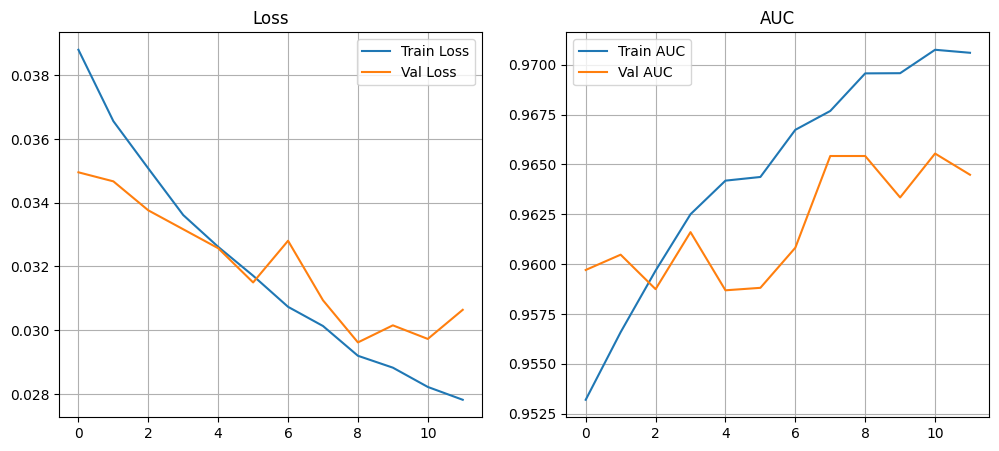

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend(); plt.grid(); plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(history.history['auc'], label="Train AUC")
plt.plot(history.history['val_auc'], label="Val AUC")
plt.legend(); plt.grid(); plt.title("AUC")

plt.show()

In [14]:
y_pred = (model.predict(X_val) > 0.5).astype(int)

6939/6939 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step


In [16]:
from sklearn.metrics import classification_report

y_val_pred = (model.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_val_pred))

6939/6939 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    217817
           1       0.82      0.65      0.73      4222

    accuracy                           0.99    222039
   macro avg       0.90      0.82      0.86    222039
weighted avg       0.99      0.99      0.99    222039



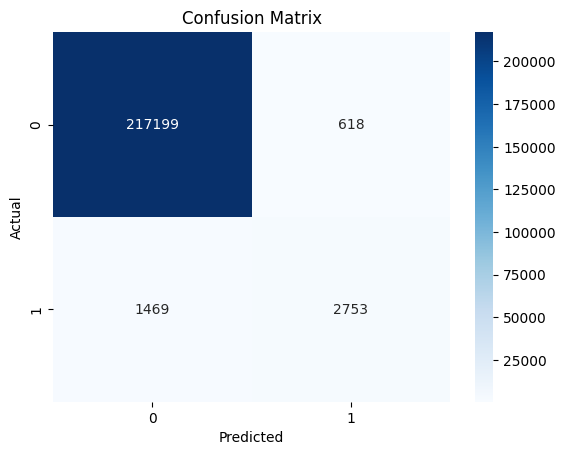

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

6939/6939 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step
Validation AUC: 0.9801


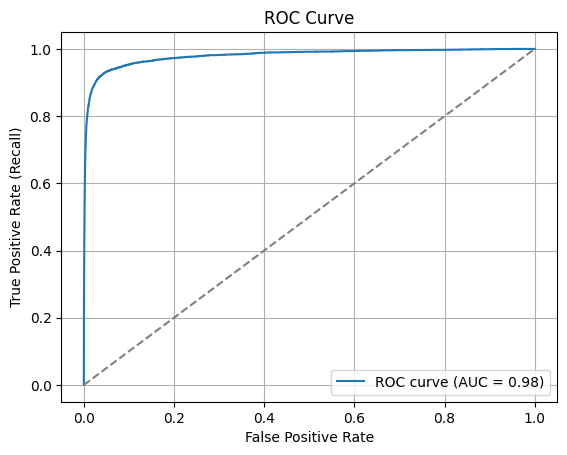

Best threshold: 0.012

Classification report at best threshold:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    217817
           1       0.30      0.93      0.45      4222

    accuracy                           0.96    222039
   macro avg       0.65      0.94      0.72    222039
weighted avg       0.99      0.96      0.97    222039



In [21]:
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

# 1. Get predicted probabilities for validation set
y_val_prob = model.predict(X_val)  # values between 0 and 1

# 2. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)
print(f"Validation AUC: {roc_auc:.4f}")

# 3. Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# 4. Find the best threshold
# Method: maximize (Recall - False Positive Rate) → Youden's J statistic
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_threshold = thresholds[best_idx]
print(f"Best threshold: {best_threshold:.3f}")

# 5. Evaluate metrics at this threshold
y_val_pred_best = (y_val_prob >= best_threshold).astype(int)
print("\nClassification report at best threshold:")
print(classification_report(y_val, y_val_pred_best))


In [25]:
# Save the GRU model
model.save("sepsis_gru_model.h5")

# Save the best threshold
import json
best_threshold = 0.013
with open("best_threshold.json", "w") as f:
    json.dump({"threshold": best_threshold}, f)


In [26]:
from tensorflow.keras.models import load_model
import json

# Load model
model = load_model("sepsis_gru_model.h5")

# Load threshold
with open("best_threshold.json", "r") as f:
    best_threshold = json.load(f)["threshold"]


In [27]:
from tensorflow.keras.models import load_model
import json

# Load GRU model
model = load_model("sepsis_gru_model.h5")

# Load best threshold
with open("best_threshold.json", "r") as f:
    best_threshold = json.load(f)["threshold"]

print("Loaded threshold:", best_threshold)


Loaded threshold: 0.013


In [28]:
# Suppose you have a test set
X_test_preprocessed = X_test  # replace with actual preprocessed test data
y_test_true = y_test          # true labels


In [29]:
# Get predicted probabilities
y_prob = model.predict(X_test_preprocessed)

# Apply threshold
y_pred = (y_prob >= best_threshold).astype(int)


6693/6693 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test_true, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    210048
           1       0.32      0.93      0.47      4127

    accuracy                           0.96    214175
   macro avg       0.66      0.94      0.73    214175
weighted avg       0.99      0.96      0.97    214175

Confusion Matrix:
[[201873   8175]
 [   304   3823]]


In [32]:
# -------------------------------
# Sepsis Prediction for One Patient (12x41)
# -------------------------------

from tensorflow.keras.models import load_model
import numpy as np
import json

# 1. Load the trained GRU model
model = load_model("sepsis_gru_model.h5")

# 2. Load the best threshold
with open("best_threshold.json", "r") as f:
    best_threshold = json.load(f)["threshold"]

print("Using threshold:", best_threshold)

# -------------------------------
# 3. Paste your patient vitals here (12 hours × 41 features)
# -------------------------------
# Replace each row with actual patient vitals for that hour
new_patient_sequence = [
    [80, 98, 36.7, 120, 80, 93, 18, 35, 1, 24, 0.21, 7.40, 40, 98, 25, 1, 10, 12, 0.5, 2, 0.1, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [82, 97, 36.8, 118, 78, 92, 19, 36, 0, 23, 0.22, 7.39, 42, 97, 24, 1, 11, 13, 0.5, 2.1, 0.1, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [81, 97, 36.7, 119, 79, 92, 18, 35, 0, 23, 0.21, 7.40, 41, 97, 24, 1, 10, 12, 0.5, 2, 0.1, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [79, 96, 36.6, 117, 77, 91, 17, 34, 0, 23, 0.21, 7.39, 39, 96, 23, 1, 9, 12, 0.5, 2, 0.1, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [78, 97, 36.7, 118, 78, 92, 18, 35, 0, 23, 0.21, 7.39, 40, 97, 24, 1, 10, 12, 0.5, 2, 0.1, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [80, 98, 36.8, 119, 79, 93, 18, 35, 1, 24, 0.21, 7.40, 41, 98, 25, 1, 10, 12, 0.5, 2, 0.1, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [81, 97, 36.7, 118, 78, 92, 18, 34, 0, 23, 0.21, 7.39, 42, 97, 24, 1, 11, 13, 0.5, 2.1, 0.1, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [82, 96, 36.6, 117, 77, 91, 17, 35, 0, 23, 0.21, 7.39, 41, 96, 23, 1, 10, 12, 0.5, 2, 0.1, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [80, 97, 36.7, 118, 78, 92, 18, 34, 0, 23, 0.21, 7.40, 40, 97, 24, 1, 10, 12, 0.5, 2, 0.1, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [79, 96, 36.6, 117, 77, 91, 17, 35, 0, 23, 0.21, 7.39, 39, 96, 23, 1, 9, 12, 0.5, 2, 0.1, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [80, 97, 36.7, 118, 78, 92, 18, 34, 0, 23, 0.21, 7.40, 40, 97, 24, 1, 10, 12, 0.5, 2, 0.1, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [81, 98, 36.8, 119, 79, 93, 18, 35, 1, 24, 0.21, 7.40, 41, 98, 25, 1, 10, 12, 0.5, 2, 0.1, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]

# Wrap in batch dimension
new_patient = np.array([new_patient_sequence])  # shape (1,12,41)

# -------------------------------
# 4. Predict probability
# -------------------------------
y_prob = model.predict(new_patient)

# -------------------------------
# 5. Apply threshold
# -------------------------------
y_pred = (y_prob >= best_threshold).astype(int)

# -------------------------------
# 6. Output result
# -------------------------------
status = "✅ Sepsis Detected" if y_pred[0][0] == 1 else "❌ No Sepsis Detected"
print("Sepsis Prediction:", status)
print("Predicted probability of sepsis:", y_prob[0][0])


Using threshold: 0.013
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Sepsis Prediction: ✅ Sepsis Detected
Predicted probability of sepsis: 0.95130223


In [33]:
from tensorflow.keras.models import load_model

# Save the model
model.save("sepsis_gru_model.h5")  # HDF5 format
print("Model saved as sepsis_gru_model.h5")


Model saved as sepsis_gru_model.h5


In [34]:
from tensorflow.keras.models import load_model

model = load_model("sepsis_gru_model.h5")


In [35]:
# Create patients_hourly.csv directly inside sepsis.ipynb
import pandas as pd
import numpy as np

num_patients = 5
hours_per_patient = 12
num_features = 41  

rows = []
for pid in range(1, num_patients + 1):
    for hour in range(hours_per_patient):
        vitals = [
            np.random.randint(70, 101),               # HR
            np.random.randint(90, 101),               # O2Sat
            round(np.random.uniform(36.0, 37.5), 1), # Temp
            np.random.randint(110, 131),              # SBP
            np.random.randint(70, 91),                # MAP
            np.random.randint(50, 81),                # DBP
            np.random.randint(12, 21),                # Resp
            np.random.randint(30, 36),                # EtCO2
        ]
        vitals += [round(np.random.uniform(0, 10), 2) for _ in range(num_features - len(vitals))]
        rows.append([pid] + vitals)

columns = ["Patient_ID"] + [f"feature_{i+1}" for i in range(num_features)]
df = pd.DataFrame(rows, columns=columns)
df.to_csv("patients_hourly.csv", index=False)

print("CSV created successfully in Kaggle working directory!")


CSV created successfully in Kaggle working directory!


In [38]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd

# Load trained model
model = load_model("sepsis_gru_model.h5")

# Drop Patient_ID before feeding to model
X = df.drop(columns=["Patient_ID"]).values  

# Reshape for GRU: (samples, timesteps, features)
num_patients = df["Patient_ID"].nunique()
hours_per_patient = 12
num_features = X.shape[1]

X = X.reshape(num_patients, hours_per_patient, num_features)

# Run predictions (model outputs probabilities)
preds = model.predict(X)

# Apply threshold = 0.013
threshold = 0.013
pred_labels = (preds > threshold).astype(int)

# Combine with Patient IDs
results = pd.DataFrame({
    "Patient_ID": df["Patient_ID"].unique(),
    "Sepsis_Probability": preds.flatten(),
    "Prediction": ["Sepsis" if p == 1 else "No Sepsis" for p in pred_labels.flatten()]
})

print(results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
   Patient_ID  Sepsis_Probability Prediction
0           1            0.953597     Sepsis
1           2            0.950201     Sepsis
2           3            0.954356     Sepsis
3           4            0.954178     Sepsis
4           5            0.950894     Sepsis
